# Python project for data science : E-commerce sentiment Analysis

###### ETTAYEBY Nissrine###### GAAMOUSSI Salma
ID2_ENSAH 


## 1-  Data import and Exploratory data analysis

In [1]:
import pandas as pd
data = pd.read_csv('Reviews.csv')

In [72]:
#infos about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [73]:
#dimention of data
data.shape

(568454, 10)

In [74]:
#display the 5 first rows of data
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [75]:
# types of the attributes
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [76]:
# describing the data
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [77]:
# find missing values
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [3]:
#Labeling Score column:  0 for score 1 & 2  and  1 for score 3 , 4 & 5
labels = {1:0,2:0,3:1,4:1,5:1}
data['Score'] = data['Score'].map(labels)

In [9]:
data.Score

0         1
1         0
2         1
3         0
4         1
         ..
568449    1
568450    0
568451    1
568452    1
568453    1
Name: Score, Length: 568454, dtype: int64

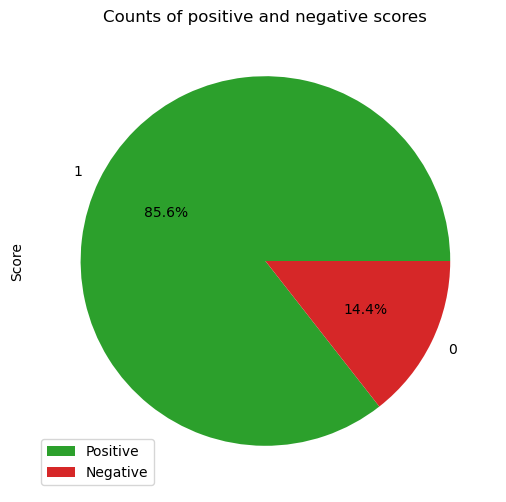

In [4]:
#Plotting the score data
import matplotlib.pyplot as plt
pie_colors = ['tab:green', 'tab:red']
data['Score'].value_counts().plot.pie(figsize=(6,6),title="Counts of positive and negative scores",autopct='%1.1f%%',colors=pie_colors)
labels=["Positive","Negative"]
plt.legend(labels,loc=3)
plt.gca().set_aspect('equal')

## 2- Splitting the data,cleaning & preprocessing 
* train = 80% (trainig set)
* val = 10%  (validation set)
* test = 10%  (test set)

In [12]:
#Removing duplicates, records that have the same UserId, ProfileName,Time and same Text, because a person cannot give two reviews or more at the same time
data.drop_duplicates(subset={'UserId', 'ProfileName', 'Time','Text'}, inplace=True)
data = data.reset_index()

#removing some columns
X = data[['Text']]  #features 
y = data[['Score']]  #target


In [13]:
#create a copy of the original data in df
df = data

In [15]:
from sklearn.model_selection import train_test_split

#Training set is 80% of the total data, and Combined set of testing & validation is 20% of the total data

x_train, x_Combine, y_train, y_Combine = train_test_split( X, y, train_size=0.8, random_state=42)
x_val, x_test, y_val, y_test = train_test_split( x_Combine, y_Combine, test_size=0.5, random_state=42)

print("Data distribution:\n- Train: {} \n- Validation: {} \n- Test: {}".format(len(y_train),len(y_val),len(y_test)))

Data distribution:
- Train: 315146 
- Validation: 39393 
- Test: 39394


### Data Cleaning steps :
* Tokenize sentences
* Remove capital letters
* Remove stopwords
* Remove non-alphanumeric characters
* Lemmatize the tokens 

In [16]:
#importing libraries
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

#creating the cleaning function 
def clean(text):
    
    #creating object for lemmatization
    wn = nltk.WordNetLemmatizer()
    
    #tokenizing text data
    tokens = nltk.word_tokenize(text)
    
    #lemmatization and removing punctuation
    lem_text = [wn.lemmatize(word) for word in tokens if word.isalpha()]
    
    #lower all letters
    lower_text = [word.lower() for word in lem_text]
    
    #defining the stop words we're going to remove
    stop_wds = stopwords.words('english')
    stop_wds = stop_wds[:115]
    clean_text = [word for word in lower_text if word not in stop_wds]

    return clean_text

In [17]:
x_test['Text'][2]

'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.'

## 3- Visualization with WordClouds

We create lists for positive and negative words from reviews data and visualize it with WordCloud.

 Processing data 


C:\Users\ettni\AppData\Local\Temp\ipykernel_24304\3570457577.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean'] = df['Text'].map(clean) #clean tokens
C:\Users\ettni\AppData\Local\Temp\ipykernel_24304\3570457577.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['clean'].apply(joint) #clean text


 Word Clouds 


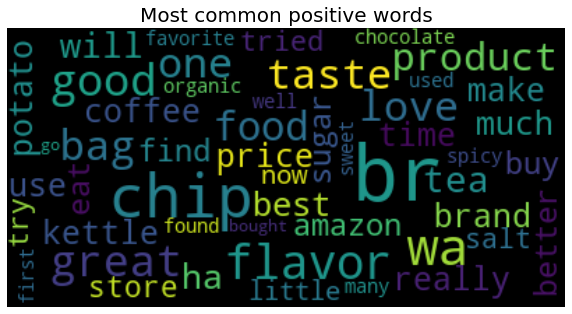

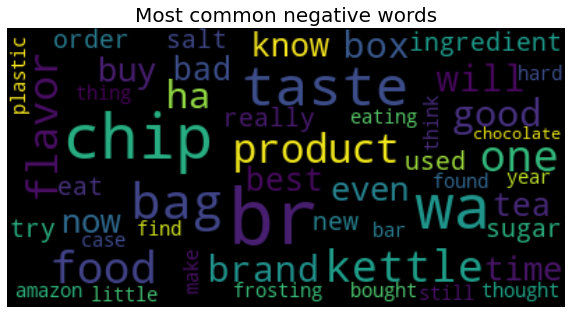

In [18]:
from wordcloud import WordCloud
from collections import Counter

def wordcloud(words,sent):
    plt.figure(figsize=(10,12))
    wc = WordCloud(collocations=False, background_color="black", max_words=50, max_font_size=55)
    wc.generate(words)
    plt.title("Most common {} words".format(sent), fontsize=20)
    plt.imshow(wc,interpolation="bilinear")
    plt.axis('off')
    
df = df.head(1000)

print(" Processing data ")
df['clean'] = df['Text'].map(clean) #clean tokens

def joint(txt):
    return ' '.join([str(word) for word in txt])

df['clean_text'] = df['clean'].apply(joint) #clean text

print(" Word Clouds ")
positive_words=" ".join(df[df.Score==1]['clean_text'].values)
negative_words=" ".join(df[df.Score==0]['clean_text'].values)

wordcloud(positive_words,"positive")
wordcloud(negative_words,"negative")

## 4- Vectorizing data using TfidfVectorizer

In [19]:
#import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

#creating the vectoriwing function 
def vectorize(txt,vectorizer):
    x_vec = vectorizer.fit_transform(txt)
    x_vec = vectorizer.transform(txt)
    return x_vec

 * importing libraries for the 4 machine learning models 

In [53]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.svm import SVC as svc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [54]:
#import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfVectorize
vectorizer = TfidfVectorizer(analyzer=clean, max_features=5500)

x_test_vec = vectorize(x_test['Text'],vectorizer)
x_train_vec = vectorize(x_train['Text'],vectorizer)
x_val_vec = vectorize(x_val['Text'],vectorizer)

In [56]:
y_train1 = y_train[:10000]
y_val1 = y_val[:10000]
y_test1 = y_test[:10000]

### 4-1 Support Vector Machine (SVM)

In [57]:
# train the model on the victorized training set
model = svc(random_state = 43)
model.fit(x_train_vec, y_train1)

#Making predictions on the victorized validation set
y_pred = model.predict(x_val_vec)

# print classification report
print(classification_report(y_val1, y_pred))

#calculating the accuracy 
acc = model.score(x_val_vec,y_val1)

print("Support Vector Machine with CountVectorizer accuracy: {}".format(round(acc * 100,2)))

C:\Users\ettni\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.17      0.00      0.00      1404
           1       0.86      1.00      0.92      8596

    accuracy                           0.86     10000
   macro avg       0.51      0.50      0.46     10000
weighted avg       0.76      0.86      0.79     10000

Support Vector Machine with CountVectorizer accuracy: 85.92


### 4-2 K-Nearest-Neighbour (KNN)

In [58]:
# train the model on the victorized training set
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train_vec, y_train1)

#Making predictions on the victorized validation set
y_pred = knn.predict(x_val_vec)

# print classification report
print(classification_report(y_val1,y_pred))

#calculating the accuracy 
acc = knn.score(x_val_vec,y_val1)

print("KNN Classifier with tfidf Accuracy: {}".format(round(acc * 100,2)))

C:\Users\ettni\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.09      0.01      0.02      1404
           1       0.86      0.98      0.92      8596

    accuracy                           0.84     10000
   macro avg       0.48      0.50      0.47     10000
weighted avg       0.75      0.84      0.79     10000

KNN Classifier with tfidf Accuracy: 84.42


### 4-3 Logistic Regression (LR)

In [59]:
# train the model on the victorized training set
lr = LogisticRegression()
lr.fit(x_train_vec, y_train1)

#Making predictions on the victorized validation set
y_pred = lr.predict(x_val_vec)


#calculating the accuracy
lr_score = lr.score(x_val_vec, y_val1)
print("Logistic Regression with tfidf Accuracy: {}".format(round(lr_score * 100,2)))

# print classification report
print(classification_report(y_val1, y_pred))
print("logistic regression with tfidf Accuracy: {}".format(round(acc * 100,2)))

C:\Users\ettni\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression with tfidf Accuracy: 85.96
              precision    recall  f1-score   support

           0       0.50      0.00      0.00      1404
           1       0.86      1.00      0.92      8596

    accuracy                           0.86     10000
   macro avg       0.68      0.50      0.46     10000
weighted avg       0.81      0.86      0.80     10000

logistic regression with tfidf Accuracy: 84.42


### 4-4 Random Forest

In [60]:
#train the model on the victorized training set
rf = RandomForestClassifier(n_estimators=100)  
rf.fit(x_train_vec, y_train1)

#Making predictions on the victorized validation set
y_pred = rf.predict(x_val_vec)

#calculating the accuracy
acc = rf.score(x_val_vec, y_val1)
print("Random Forest with tfidf Accuracy: {}".format(round(acc * 100,2)))

# print classification report
print(classification_report(y_val1, y_pred))
print("Random forest with tfidf Accuracy: {}".format(round(acc * 100,2)))

C:\Users\ettni\AppData\Local\Temp\ipykernel_24304\1273621247.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_vec, y_train1)


Random Forest with tfidf Accuracy: 85.13
              precision    recall  f1-score   support

           0       0.10      0.01      0.01      1404
           1       0.86      0.99      0.92      8596

    accuracy                           0.85     10000
   macro avg       0.48      0.50      0.47     10000
weighted avg       0.75      0.85      0.79     10000

Random forest with tfidf Accuracy: 85.13


## 5- Vertorizing data using CountVectorizer

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cvectorizer = CountVectorizer(analyzer=clean,max_features=5500)


x_test_cv = vectorize(x_test['Text'][:10000],cvectorizer)
x_train_cv = vectorize(x_train['Text'][:10000],cvectorizer)
x_val_cv = vectorize(x_val['Text'][:10000],cvectorizer)

In [39]:
y_train = y_train[:10000]
y_val = y_val[:10000]
y_test = y_test[:10000]

### 5-1 Support Vector Machine(SVM)

In [40]:
#train the model on the victorized training set
model = svc(random_state = 43)
model.fit(x_train_cv, y_train)

#Making predictions on the victorized validation set
y_pred = model.predict(x_val_cv)

# print classification report
print(classification_report(y_val, y_pred))

acc = model.score(x_val_cv,y_val)

print("Support Vector Machine with CountVectorizer accuracy: {}".format(round(acc * 100,2)))

C:\Users\ettni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ettni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ettni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1404
           1       0.86      1.00      0.92      8596

    accuracy                           0.86     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.74      0.86      0.79     10000

Support Vector Machine with CountVectorizer accuracy: 85.96


### 5-2 K-Nearest-Neighbour (KNN)

In [46]:
#train the model on the victorized training set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_cv, y_train)

#Making predictions on the victorized validation set
y_pred = knn.predict(x_val_cv)

# print classification report
print(classification_report(y_val, y_pred))

acc = knn.score(x_val_cv,y_val)

print("knn with CountVectorizer accuracy: {}".format(round(acc * 100,2)))

C:\Users\ettni\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.20      0.00      0.00      1404
           1       0.86      1.00      0.92      8596

    accuracy                           0.86     10000
   macro avg       0.53      0.50      0.46     10000
weighted avg       0.77      0.86      0.79     10000

knn with CountVectorizer accuracy: 85.9


### 5-3 Logistic Regression

In [47]:
#train the model on the victorized training set
lr = LogisticRegression()
lr.fit(x_train_cv, y_train)

#Making predictions on the victorized validation set
y_pred = lr.predict(x_val_cv)


#calculating the accuracy
lr_score = lr.score(x_val_cv, y_val)

# print classification report
print(classification_report(y_val, y_pred))
print("logistic regression with CountVectorizer accuracy: {}".format(round(acc * 100,2)))

C:\Users\ettni\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression with tfidf Accuracy: 79.93
              precision    recall  f1-score   support

           0       0.20      0.14      0.16      1404
           1       0.87      0.91      0.89      8596

    accuracy                           0.80     10000
   macro avg       0.53      0.52      0.52     10000
weighted avg       0.77      0.80      0.78     10000

logistic regression with CountVectorizer accuracy: 85.9


C:\Users\ettni\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 5-4 Random Forest

In [50]:
#train the model on the victorized training set
rf = RandomForestClassifier(n_estimators=100)  
rf.fit(x_train_cv, y_train)

#Making predictions on the victorized validation set
y_pred = rf.predict(x_val_cv)

#calculating the accuracy
acc = rf.score(x_val_cv, y_val)

# print classification report
print(classification_report(y_val, y_pred))
print("Random forest with CountVectorizer accuracy: {}".format(round(acc * 100,2)))

C:\Users\ettni\AppData\Local\Temp\ipykernel_24304\2238896945.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_cv, y_train)


Random Forest with tfidf Accuracy: 77.24
              precision    recall  f1-score   support

           0       0.15      0.14      0.15      1404
           1       0.86      0.88      0.87      8596

    accuracy                           0.77     10000
   macro avg       0.51      0.51      0.51     10000
weighted avg       0.76      0.77      0.77     10000

Random forest with CountVectorizer accuracy: 77.24


## 6- Comparison of machine learning models using two methods of vectorizing data

In [64]:
#importing the libraries using in the comparison
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [67]:
# Comparison table for machine learning models

predictions1 = knn.predict(x_test_cv)
predictions2 = knn.predict(x_test_vec)
predictions11 = lr.predict(x_test_cv)
predictions22 = lr.predict(x_test_vec)

predictions3 = model.predict(x_test_cv)
predictions4 = model.predict(x_test_vec)
predictions33 = rf.predict(x_test_cv)
predictions44 = rf.predict(x_test_vec)

print('*************************Count Vectorizer***************************')
print('____________________________________________________________________','\n')
print("--------------Confusion Matrix--------------")
print('knn: ',confusion_matrix(y_test,predictions1)) 
print("--------------Confusion Matrix--------------")
print('SVM:',confusion_matrix(y_test,predictions3)) 
print("--------------Confusion Matrix--------------")
print('logistic regression:',confusion_matrix(y_test,predictions11)) 
print("--------------Confusion Matrix--------------")
print('Random forest:',confusion_matrix(y_test,predictions33)) 
print('___________________________________________________________________','\n')
print("-------------- Accuracy --------------")
print('knn: ',accuracy_score(y_test,predictions1))
print("-------------- Accuracy --------------")
print('SVM:',accuracy_score(y_test,predictions3))
print("-------------- Accuracy --------------")
print('logistic regression: ',accuracy_score(y_test,predictions11))
print("-------------- Accuracy --------------")
print('Random forest:',accuracy_score(y_test,predictions33))
print('____________________________________________________________________','\n')      
print("--------------Classification Report1--------------")
print('knn: ',classification_report(y_test,predictions1))
print("--------------Classification Report2--------------")
print('SVM:',classification_report(y_test,predictions3))
print("--------------Classification Report3--------------")
print('logistic regression: ',classification_report(y_test,predictions11))
print("--------------Classification Report4--------------")
print('Random forest:',classification_report(y_test,predictions33))


print('___________________________________________________________________________________','\n','___________________________________________________________________________________','\n','____________________________________________________________________________________','\n')


print('************************TFIDF Vectorizer***************************')
print('____________________________________________________________________','\n')
print("--------------Confusion Matrix--------------")
print('knn: ',confusion_matrix(y_test,predictions2)) 
print("--------------Confusion Matrix--------------")
print('SVM:',confusion_matrix(y_test,predictions4)) 
print("--------------Confusion Matrix--------------")
print('logistic regression: ',confusion_matrix(y_test,predictions22)) 
print("--------------Confusion Matrix--------------")
print('Random forest:',confusion_matrix(y_test,predictions44)) 
print('____________________________________________________________________','\n')
print("-------------- Accuracy --------------")
print('knn: ',accuracy_score(y_test,predictions2))
print("-------------- Accuracy --------------")
print('SVM:',accuracy_score(y_test,predictions4))
print("-------------- Accuracy --------------")
print('logistic regression: ',accuracy_score(y_test,predictions22))
print("-------------- Accuracy --------------")
print('Random forest:',accuracy_score(y_test,predictions44))
print('_____________________________________________________________________','\n')            
print("--------------Classification Report1--------------")
print('knn: ',classification_report(y_test,predictions2))
print("--------------Classification Report2--------------")
print('SVM:',classification_report(y_test,predictions4))
print("--------------Classification Report3--------------")
print('logistic regression: ',classification_report(y_test,predictions22))
print("--------------Classification Report4--------------")
print('Random forest:',classification_report(y_test,predictions44))

*************************Count Vectorizer***************************
____________________________________________________________________ 

--------------Confusion Matrix--------------
knn:  [[  19 1446]
 [ 139 8396]]
--------------Confusion Matrix--------------
SVM: [[   0 1465]
 [   0 8535]]
--------------Confusion Matrix--------------
logistic regression: [[ 219 1246]
 [1317 7218]]
--------------Confusion Matrix--------------
Random forest: [[ 527  938]
 [2774 5761]]
___________________________________________________________________ 

-------------- Accuracy --------------
knn:  0.8415
-------------- Accuracy --------------
SVM: 0.8535
-------------- Accuracy --------------
logistic regression:  0.7437
-------------- Accuracy --------------
Random forest: 0.6288
____________________________________________________________________ 

--------------Classification Report1--------------
knn:                precision    recall  f1-score   support

           0       0.12      0.01      0

C:\Users\ettni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ettni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ettni\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
